In [1]:
import funcList as fl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import cm
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
fl.setDefault()

## Case study 1: Convolution plot
In this case, we want to plot 2 signals and their convolution. We first extract the data and check the columns

In [2]:
filePath0 = 'data/convDummy.csv'
df1 = fl.extractData(filePath0)
df1.head()

,tList,exp1,expConv,exp2
0,0.0,1.000000,1.000000,1.000000
1,0.1,0.967216,1.942526,0.975310
2,0.2,0.935507,2.830072,0.951229
3,0.3,0.904837,3.665035,0.927743
4,0.4,0.875173,4.449718,0.904837


It seems the second and third column are misplaced. We re-extract the data and rearrange the columns

In [3]:
#extractData while rearranging the column
df1 = fl.extractData(filePath0,colList=[0,1,3,2])
df1.head(20)

,tList,exp1,exp2,expConv
0,0.0,1.000000,1.000000,1.000000
1,0.1,0.967216,0.975310,1.942526
2,0.2,0.935507,0.951229,2.830072
3,0.3,0.904837,0.927743,3.665035
4,0.4,0.875173,0.904837,4.449718
5,0.5,0.846482,0.882497,5.186336
6,0.6,0.818731,0.860708,5.877015
7,0.7,NaN,0.839457,5.731911
8,0.8,0.765928,0.818731,6.356318
9,0.9,0.740818,0.798516,6.940198


There are some entries missing. We delete the rows containing missing entries

In [4]:
#clean data to remove rows with nonfloat entry
print(df1.size)
df1 = fl.cleanData(df=df1)
print(df1.size)

2004
1988


Next, we plot the graph. Convolution of two signals will be larger than the two signals. So we plot the convoluted signal in secondary y axis

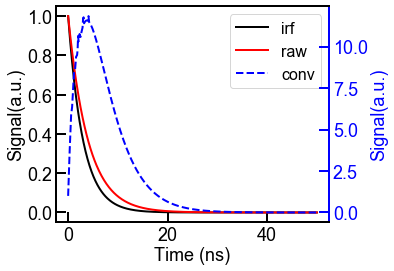

In [5]:
#plot exp1 and exp2 with the same y axis and expConv on different y axis
fig=fl.createFig()
ax1 = fl.createAx(fig=fig)
ax2 = fl.createAx(fig=fig,ax1=ax1)
fl.plot1Graph(dataList=[df1.iloc[:,[0,1]],df1.iloc[:,[0,2]]],typeList=['auto0;;auto0;repeat'],labelList=['irf','raw'],axObj=ax1)
fl.setAx(ax=ax1,xLabel='Time (ns)',yLabel='Signal(a.u.)')
fl.plot1Graph(dataList=[df1.iloc[:,[0,3]]],typeList=['auto2;;--'],labelList=['conv'],axObj=ax2)
fl.setAx(ax=ax2,yLabel='Signal(a.u.)')
# Set color for clarity
# Todo: Include this functionality in funcList
ax2.spines['right'].set_color('blue')
ax2.tick_params(axis='y',colors='blue',which='both')
ax2.yaxis.label.set_color('blue')
#set legend
fl.createLegend(axPrimer=ax1,axList=[ax1, ax2])

## Case study 2: Multiple fit
Here, we have a dummy data resulted from sweeping 2 parameters (x,y) to get the the signal (z). We want to analyze the effect of x on y vs z. As in Case study 1, we start by extracting and cleaning the data

In [6]:
filePath1 = 'data/shiftLine.csv'
df = fl.cleanData(fl.extractData(path=filePath1))
df.head()

,xArr2,yArr2,zArr2
0,-3.0,-3.0,10.482597
1,-3.0,-2.9,9.761660
2,-3.0,-2.8,10.164283
3,-3.0,-2.7,9.943531
4,-3.0,-2.6,9.722873


Next we group by x value and do the multiple linear fit for each y vs z @ x. As can be seen from figure below, the y and z has linear relationship and there is a strong relation between slope and offset.

array([0.00000000e+00, 1.88941525e+00, 1.02465107e+00, 1.24525087e-16])

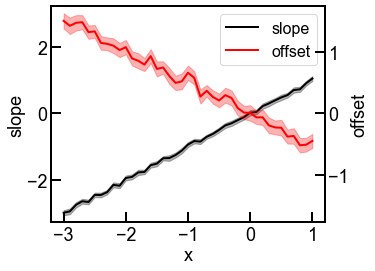

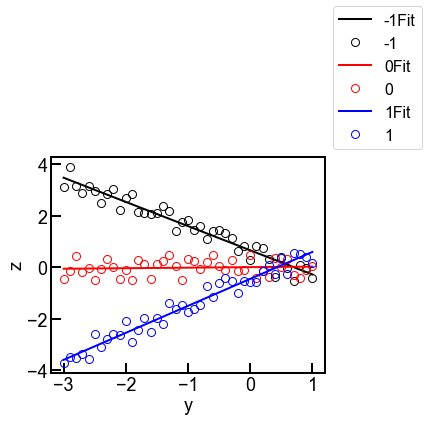

In [7]:
dfg = df.groupby(df.iloc[:,0])
fig = fl.createFig()
ax1 = fl.createAx(fig=fig)
ax2 = fl.createAx(fig=fig,ax1=ax1)
fig2 = fl.createFig()
ax3 = fl.createAx(fig=fig2)
fl.multiFit(colX=1,colY=2,fun=fl.linFun,dfg=dfg,axList=[ax1,ax2],axPrimer=[ax1],xLabel=['x'],yLabel=['slope','offset'],xyAx=ax3,valList=[-1,0,1],plotType='line',plotErrType='fill')
fl.setAx(ax=ax3,xLabel='y',yLabel='z')
#align 0 of slope and offset
fl.align0(ax1=ax1,ax2=ax2)